In [27]:
import numpy as np

#**Logistic Regression**

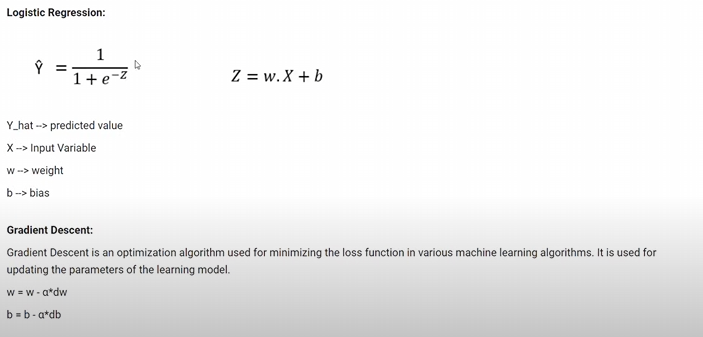

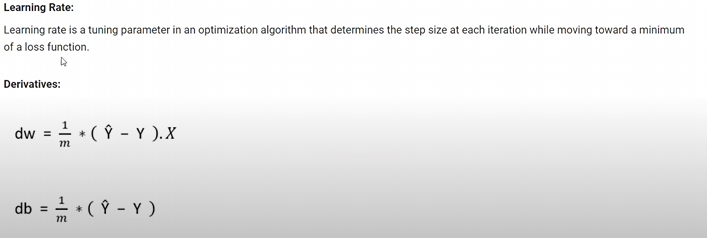

In [28]:
class logistic_regression():

# declaring learning rate & number of iterations (hyperparameters)
  def __init__(self,learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

#fit function to train the model with dataset
  def fit(self,x,y):

    #number of data points in the dataset (number of rows) --> m
    #number of input features in the dataset (number of columns) -->n
    self.m, self.n = x.shape
    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    #implementing gradient descent for optimization

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    #y_hat formula (sigmoid function)
    y_hat= 1 / (1+np.exp(-(self.x.dot(self.w)+self.b) ))

    #derivation
    dw = (1/ self.m)* np.dot(self.x.T, (y_hat - self.y))
    db = (1/ self.m)* np.sum(y_hat - self.y)

    #updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate *dw
    self.b = self.b - self.learning_rate *db


  def predict(self,x):
    y_pred = 1 / (1+np.exp(-(x.dot(self.w)+self.b) ))
    y_pred = np.where(y_pred > 0.5,1,0)
    return y_pred



In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
dataset = pd.read_csv('diabetes.csv')

In [31]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
dataset.shape

(768, 9)

In [33]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [35]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [36]:
#separating the data and labels
features = dataset.drop(columns = 'Outcome', axis =1)
target = dataset['Outcome']

In [37]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [38]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(features)

StandardScaler()

In [41]:
data = scaler.transform(features)

In [42]:
print(data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [43]:
features = data
target = dataset['Outcome']

In [44]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [45]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state =2)

In [46]:
print(features.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [47]:
classifier = logistic_regression(learning_rate=0.01, no_of_iterations = 1000 )

In [49]:
classifier.fit(x_train,y_train)

In [50]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [51]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.7768729641693811


In [52]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [53]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663
